In [7]:
### Ok so apparently the FFT algorithm needs equally spaced points in time to do the algorithm,
### if that is not the case then one has to do interpolation. First I will try on the daily prices to see if that yields 
### a sufficient result
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
daily = pd.read_csv('data/daily_price_history.csv', index_col = 0)
daily

,timestamp,price
0,1.279325e+12,0.05
1,1.279411e+12,0.07
2,1.279498e+12,0.09
3,1.279584e+12,0.08
4,1.279670e+12,0.07
5,1.279757e+12,0.06
6,1.279843e+12,0.06
7,1.279930e+12,0.05
8,1.280016e+12,0.05
9,1.280102e+12,0.05


(0, 1300)

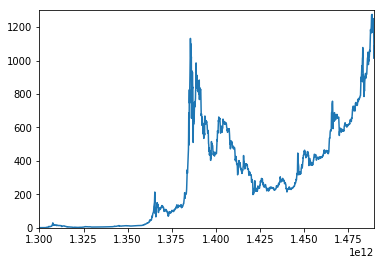

In [14]:
fig, ax = plt.subplots()
ax.plot(daily.timestamp,daily.price)
plt.xlim(1.3e12,1.49e12)
plt.ylim(0,1300)

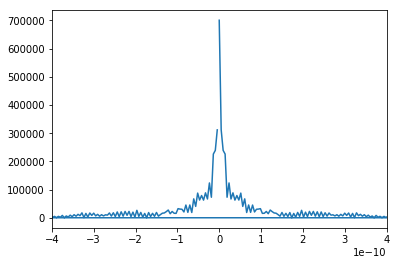

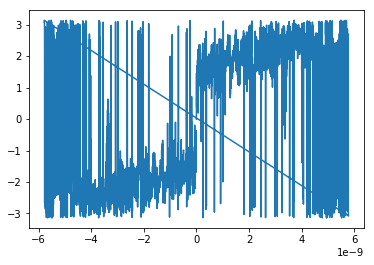

In [29]:
### Time to do the FFT!
y = daily.price
t = daily.timestamp
Y  = np.fft.fft(y)
freq = np.fft.fftfreq(len(y), t[1] - t[0])

plt.figure()
plt.plot( freq, np.abs(Y) )
plt.xlim(-4e-10,4e-10)
plt.figure()
plt.plot(freq, np.angle(Y) )
plt.show()

In [31]:
Y

array([ 700342.87000000     +0.j        ,
         34109.64292901+310095.55196411j,
        223593.30396950 +85333.34593945j, ...,
        -26477.85870896-224710.85727206j,
        223593.30396950 -85333.34593945j,   34109.64292901-310095.55196411j])

/home/mes/venv/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


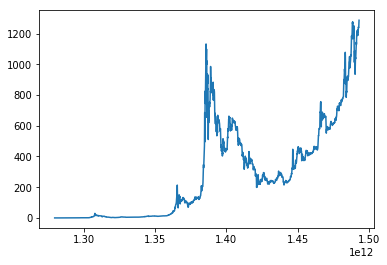

In [30]:
### Time to do the inverse FFT!

Iy  = np.fft.ifft(Y)
np.fft.fftfreq
#It = np.fft.fftfreq(len(y), t[1] - t[0])

plt.figure()
plt.plot( t, Iy )
#plt.xlim(-4e-10,4e-10)
plt.figure()

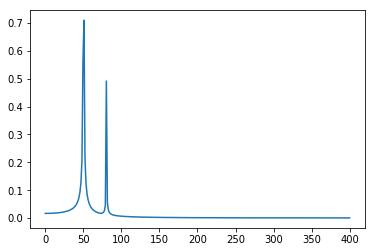

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

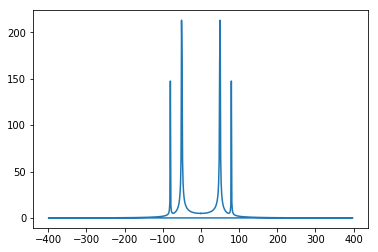

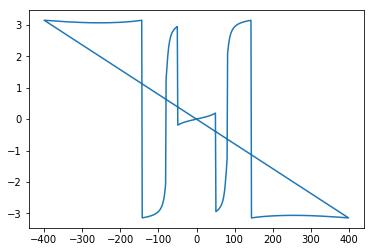

In [19]:
Y  = np.fft.fft(y)
freq = np.fft.fftfreq(len(y), x[1] - x[0])

plt.figure()
plt.plot( freq, np.abs(Y) )
plt.figure()
plt.plot(freq, np.angle(Y) )
plt.show()

(array([ 973.,  155.,   60.,  216.,  113.,  131.,  175.,   97.,   50.,
         167.,   86.,   52.,   39.,   31.,   25.,   27.,   22.,    9.,
          25.,   17.]),
 array([  5.00000000e-02,   6.43830000e+01,   1.28716000e+02,
          1.93049000e+02,   2.57382000e+02,   3.21715000e+02,
          3.86048000e+02,   4.50381000e+02,   5.14714000e+02,
          5.79047000e+02,   6.43380000e+02,   7.07713000e+02,
          7.72046000e+02,   8.36379000e+02,   9.00712000e+02,
          9.65045000e+02,   1.02937800e+03,   1.09371100e+03,
          1.15804400e+03,   1.22237700e+03,   1.28671000e+03]),
 <a list of 20 Patch objects>)

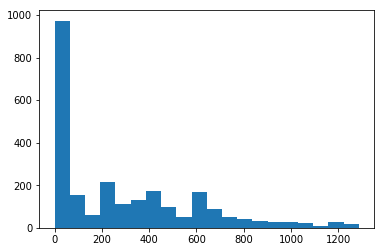

In [42]:
plt.hist(daily.price, bins = 20)

In [34]:
print np.var(daily.price)
print np.mean(daily.price)

95462.823223
283.539623482
